In [1]:
import pandas as pd

In [9]:
#Load USDA database & transform it into the form we need
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )


,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


Current thought:
- amount of foods are inputs
- quality rates are weights (e.g., amount of calories per 100gs)

In [37]:
#very basic prototype optimization algorithm

import numpy as np
import matplotlib.pyplot as plt

#intialzie amounts
amounts = np.array([[1.0,1.0]])

#rows represent food, cols represent qualities
quality_rates = np.array([[1,2,.5],
                          [1,2,2]])

learning_rate = .001

#goal amounts
targets = [5,10,8]

outputs, errors, amountss = [], [], []

stop_time = 1000
for i in range(stop_time):
    output = np.dot(amounts, quality_rates)
    outputs.append(output)
    #squared error is the loss function
    error = (output - targets)**2
    errors.append(error)
    #derivative of loss wrt to output
    dloss = 2*(output - targets)
    #print(dloss)

    dmax = targets.copy
    dmax = np.ones_like(output)
    dmax[output >= targets] = 0 
    #print(dmax)

    dfoods = dloss * dmax
    #print(dfoods)

    #deriv wrt amounts is quality rate
    dinputs = np.dot(dfoods, quality_rates.T)
    #print(dinputs)

    amounts += -learning_rate * dinputs
    amountss.append(amounts)


print(amounts)
print(output)
print(error)

[[2.27147371 3.43186411]]
[[ 5.70333513 11.40667026  7.9994605 ]]
[[4.94680305e-01 1.97872122e+00 2.91059849e-07]]


How to fully implement for food
- we are going to minimize cost, while trying to meet thresholds for other items

In [1]:
import pandas as pd
import numpy as np
food_data = pd.read_excel(r"C:\Users\Chris\Desktop\Diet Data\Diet Optimization.xlsx", sheet_name="For Python Test")

In [2]:
quality_rates = food_data.iloc[0:20,6:].to_numpy()

In [3]:
target_values = food_data.iloc[24:,2].to_numpy().astype(float).reshape(1,-1)
target_values

array([[0.000e+00, 2.035e+03, 1.530e+02, 5.000e+01, 2.000e+02, 3.000e+01,
        1.000e+03, 4.000e+02, 9.000e+02, 2.400e+00, 1.300e+00, 9.000e+01,
        1.500e+01, 1.500e+01, 1.200e+02, 9.000e-01, 8.000e+00, 4.000e+02,
        1.100e+01, 7.000e+02, 5.500e+01, 3.400e+03, 1.500e+03, 5.500e+02,
        1.200e+00, 1.300e+00, 1.600e+01, 1.600e+00]])

In [4]:
food_limits = food_data.iloc[24:44,6].to_numpy().reshape(1,-1)

In [5]:
food_req = food_data.iloc[24:44,9].to_numpy().reshape(1,-1)

In [103]:
amounts = np.random.rand(1,20) * 10
learning_rate = .001
starting_learning_rate = .001
learning_rate_decay = 0.0001
errors = []

cache = np.zeros_like(amounts)
epsilon = 1e-7
rho = .95

momentum_array = np.zeros_like(amounts)
momentum = 0

for i in range(30000):

    amounts[amounts < food_req] = food_req[amounts < food_req]
    amounts[amounts > food_limits] = food_limits[amounts > food_limits]

    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    errors.append(np.mean(error))

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    #dmax[0,0] = 0
    dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    
    dfoods = dloss * dmax
    dinputs = np.dot(dfoods, quality_rates.T)

    cache = cache * rho + (1-rho) * dinputs.astype(float) ** 2
    #cache += dinputs.astype(float) **2
    amounts += -learning_rate * dinputs.astype(float) / (np.sqrt(cache) + epsilon)

    learning_rate = starting_learning_rate * (1 / (1 + learning_rate_decay * i))

results = np.dot(amounts, quality_rates)
print(results)
print(results - target_values)

[[14.174153013208631 2037.7498369217892 185.87967500300357
  61.32196969909901 191.68012713887134 35.577429306781625
  996.8153219360871 408.83587622159644 1272.6105735532565
  5.76600169735042 4.6901249882648575 259.6432483802768 9.638238254089723
  15.154560724879259 690.7220037280769 1.7118278520258026
  13.186143549804871 650.6669962873787 14.104240117030377
  2569.769555991649 249.10448973172888 4409.643656873475
  3226.2731804598297 545.1265604011853 1.6654526239943808
  3.1869494936328513 52.91938183014841 2.5257004820264797]]
[[14.174153013208631 2.7498369217892105 32.87967500300357
  11.321969699099007 -8.319872861128658 5.5774293067816245
  -3.1846780639128838 8.835876221596436 372.6105735532565
  3.3660016973504203 3.3901249882648576 169.64324838027682
  -5.361761745910277 0.15456072487925887 570.7220037280769
  0.8118278520258025 5.186143549804871 250.66699628737865
  3.1042401170303773 1869.7695559916492 194.10448973172888
  1009.6436568734753 1726.2731804598297 -4.8734395

In [80]:
cache

array([[7.92124611e+10, 1.95698698e+12, 7.88410395e+11, 7.17674407e+10,
        1.98054182e+10, 8.91078596e+09, 4.02406339e+09, 4.85797524e+10,
        4.21504628e+11, 8.08379893e+09, 1.00875162e+10, 3.12740731e+09,
        1.15082723e+10, 1.98243364e+11, 2.30556294e+11, 4.08875244e+10,
        1.01173487e+11, 2.13057324e+12, 2.60394199e+08, 3.45647204e+11]])

In [79]:
dmax

array([[1, 1, 0.0, 0.0, 1, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0]],
      dtype=object)

In [13]:
dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
#dmax[0,0] = 0
dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
dmax

array([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 0.0, 1, 1, 0.0, 0.0, 1, 1, 1,
        0.0, 0.0, 1, 0.0, 1, 1, 0.0, 0.0, 1]], dtype=object)

In [53]:
print(len(dmax[0,2:][outputs[0,2:] >= target_values[0,2:]]))
print(len(dmax[0,2:]))

20
26


In [12]:
amounts

array([[3.        , 0.        , 0.        , 5.        , 1.5       ,
        1.        , 0.5       , 1.5       , 0.        , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.03119296, 1.4       ,
        1.        , 2.1       , 0.        , 2.3       , 0.2       ]])

Notes from this go around:
- have been successful in closely matching excel output
- requires averaging gradients (dividing dloss by sum of dmax)
- without cost constraint we get very close to solver results
- with cost constaint it is close, but a bit more different
- ideal learning rate  learning_rate = .00001

Possible Improvements
- RMS prop?/ADA grad?? - i think the key will be some type of per-parameter learning rate, as the parameters have very differnet sizes, thus a global rate does not work well. For example, applying the same learning rate to calories and omega3s doesn't work because calories has much higher magnitude values than omega3
- momentum
- adaptive gradient
- learning rate decay

Features that I don't think are very helpful (pre-adagrad/RMS prop):
- gradient normalization - does not seem to make a huge difference. I think this is not very beneficial because there is nothing really to smooth out. We are stochastically descending the gradient and don't have batches. 
- learning rate decay - does not seem to help. The varying magnitude of parameters remove the effectiveness of learning rate decay because we are using a uniform decay rate. Thus suffers from same issue as uniform learning rate
- momentum

After adding adagrad & rmsprop
- we get to a local minimum quite quickly, which is close to excel solver solution => and if parameters are set accordinly, can get very similar solutions between RMSprop and ada grad
- ada grad does best with learning rate of 1, RMS .001. Same lrd
- perhaps try adam next. But I am starting to think this is probably the most optimal solution we will get

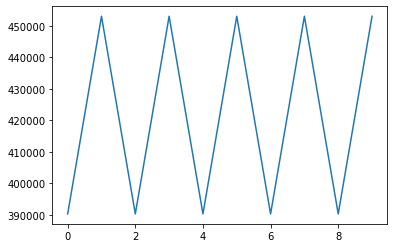

In [21]:
import matplotlib.pyplot as plt

plt.plot(errors[9990:])
plt.show()

In [526]:
amounts

array([[2.84186494, 0.        , 0.        , 2.42886655, 1.46347727,
        0.96179618, 0.46454403, 1.408519  , 0.        , 0.45132228,
        0.44537186, 0.46726505, 0.44023481, 0.        , 0.66744027,
        0.97448963, 2.04262634, 0.        , 2.29336182, 0.2       ]])